# Ridge And Lasso Regression

## House Price Prediction :

* Dataset: [Go to Dataset Download Page](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

### Data Handling :


In [1]:
# Importing Required Libraries

## Data Handling :
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gd # for creating multiple plot in a single figsize
from scipy.stats import norm, skew, probplot
import statsmodels.tsa.api as smt
# Transformation
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

## Model Building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
import statsmodels.api as sm
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

# Setting Default 
warnings.filterwarnings('ignore')
pd.options.display.max_colwidth=None
pd.options.display.max_columns=None
%matplotlib inline

In [2]:
# Reading Files From Local Directory
data=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


 #### Attributes Information:
 MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


In [4]:
print('Data Shape is :',data.shape)
print('test data Shape is :',test.shape) # One column less than the data as target is not in test data

Data Shape is : (1460, 81)
test data Shape is : (1459, 80)


In [5]:
# Removing unwanted feaures from data  :
data.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [6]:
# Converting Some Features to Categorical as they represent categorical data in numeric form
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['MoSold'] = data['MoSold'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)
test['MoSold'] = test['MoSold'].astype(str)

In [7]:
# Handling Datetime columns:
# There are 4 columns reprsenting year only.
# It can be useful to transformthis to a numerical data by converting into a value.
# Representing years with respect to the year sold will be usefull.
# If the null values are present in the columns containing datetime, we can put the 'YrSold' Year as the Year considering the new building.

year_cols = [col for col in data.columns if 'Yr' in col or 'Year' in col]
year_cols.remove('YrSold')

for col in year_cols:
    data[col]=data[col].fillna(data[col].median())
    data[col]=data['YrSold']-data[col].astype(int)
    test[col]=test[col].fillna(test[col].median())
    test[col]=test['YrSold']-test[col].astype(int)

### Data Analysis

* Data Analysis consist of following process to perform quality of data :
    1. [Seprating data in Numeric and Categorical](#Data-Category-Sepration)
    2. [Missing Values detection and handling](#Missing-Value-Handling)
    3. [Analysis of Numerical Features on target](#Analysis-of-Numeric-Features-on-Target)
    4. [Distribution of the Numerical Variables](#Distribution-Of-Numeric-Features)
    5. [Analysis Categorical Variables on target](#Analysis-of-Categorical-Features-on-Target)
    6. [Outliers](#Outliers-In-Numeric-Data)
    7. [Relationship between independent and dependent feature(SalePrice)](#Relation-of-dependant-and-independant-variable)
    8. [Target variable Analysis](#Target-Variable-Analysis)
    9. [Feature Engineering](#Feature-engineering)
    10. [Skewness](#Skewness-In-Numeric-Data)

#### Data Category Sepration

In [8]:
# I seprated data of train Only as it going to help in EDA
num_col=data.select_dtypes(exclude='object').columns
cat_col=data.select_dtypes(include='object').columns

#### Missing Value Handling

In [9]:
# Function To give Missing Value Imformation 
def missing_values(df):
    col=df.isnull().sum().index
    miss_val=df.isnull().sum().values
    percentages =df.isnull().sum()/df.shape[0]
    temp={'Columns':col,'Missing Values':miss_val,'Missing Percentage':percentages.values}
    missing=pd.DataFrame(data=temp)
    missing=missing[missing['Missing Values']>0].sort_values('Missing Values',ascending=False)
    return (missing)

In [10]:
missing_in_data=missing_values(data)
missing_in_data

,Columns,Missing Values,Missing Percentage
71,PoolQC,1453,0.995205
73,MiscFeature,1406,0.963014
5,Alley,1369,0.937671
72,Fence,1179,0.807534
56,FireplaceQu,690,0.472603
2,LotFrontage,259,0.177397
57,GarageType,81,0.055479
59,GarageFinish,81,0.055479
62,GarageQual,81,0.055479
63,GarageCond,81,0.055479


In [11]:
missing_in_test=missing_values(test)
missing_in_test

,Columns,Missing Values,Missing Percentage
71,PoolQC,1456,0.997944
73,MiscFeature,1408,0.965045
5,Alley,1352,0.926662
72,Fence,1169,0.801234
56,FireplaceQu,730,0.500343
2,LotFrontage,227,0.155586
63,GarageCond,78,0.053461
62,GarageQual,78,0.053461
59,GarageFinish,78,0.053461
57,GarageType,76,0.052090


* For simplicity and from diluting data from false null imputation ,Let's Drop the data with null values more than 50 % (From Test and data ) .
* For other features ( missing Percentage less than 50%),analysing effect of null data rows on target should be exmined.

In [12]:
# For 50% and above null data Features.
# Removing High in Null Features.
remove_col=list(missing_in_data[missing_in_data['Missing Percentage']>0.50]['Columns'].values) # Columns To be removed.
data=data.drop(remove_col,axis=1)
test=test.drop(remove_col,axis=1) # Similar Features dropped as model is not goving to train on that features. 

In [13]:
# Updateing Column Sepration
num_col=data.select_dtypes(exclude='object').columns
cat_col=data.select_dtypes(include='object').columns

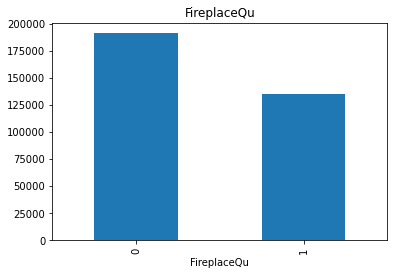

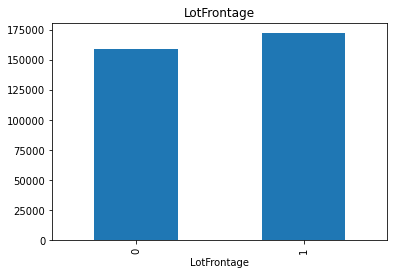

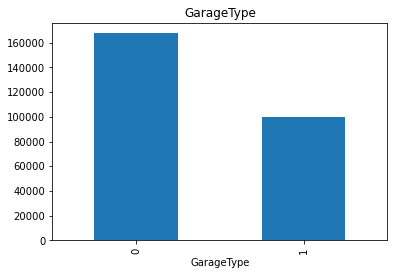

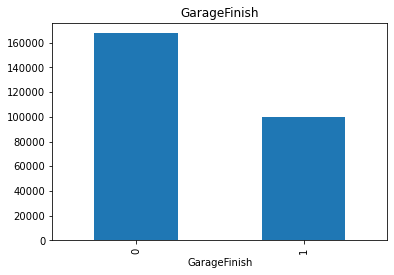

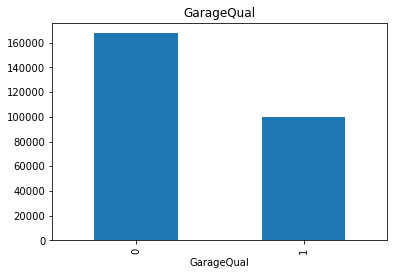

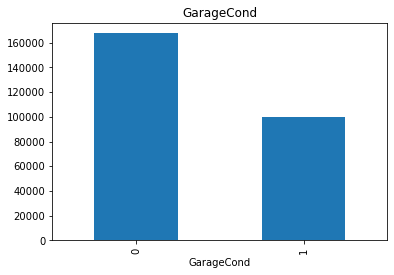

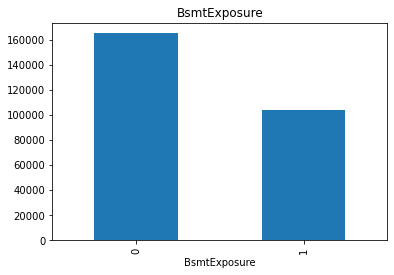

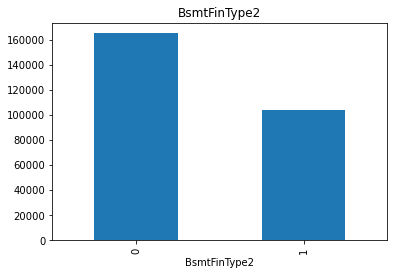

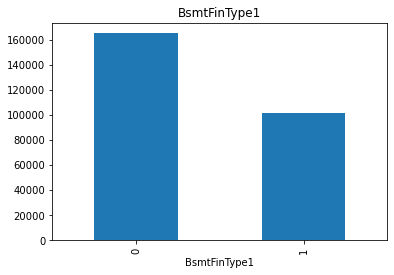

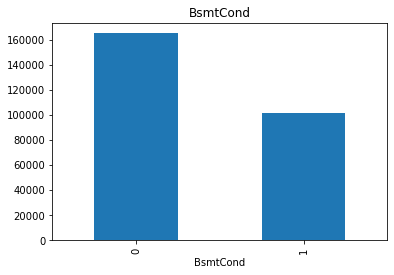

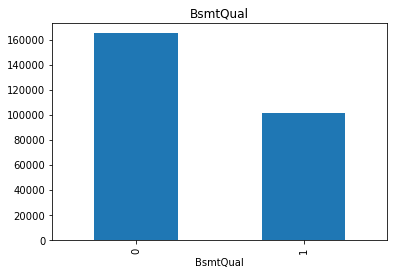

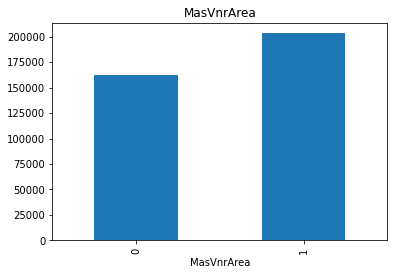

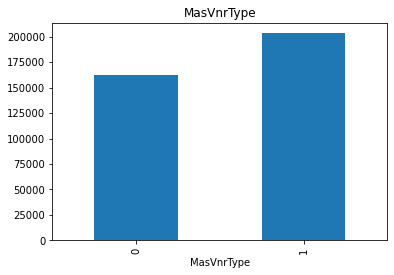

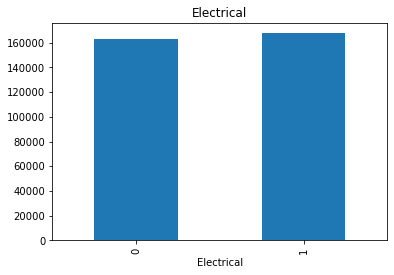

In [14]:
# For Features having less null values than 50% .
# Finding relation of Other null containg Feature with the target variable (SelePrice).
# I created two group of data that has null value and not.and the sell price median of the both group shows as it's relevent to target or not.

non_remove_col=[col for col in missing_in_data['Columns'] if col not in remove_col]

for col in non_remove_col:
    temp_data=data.copy()
    # Creating Group of 1 and 0 if it is null then it gives label 1 otherwise 0
    temp_data[col]=np.where(temp_data[col].isnull(),1,0)
    temp_data.groupby(col)['SalePrice'].median().plot.bar()
    plt.title(col)
    plt.show()
    

    

* Plot Shows median value of 1 as indicating null values has similar relation as of non null values on target.as median of both are in close interval.
* We Replace this null values with appropiate values.

In [15]:
# Imputing Median Value in the Numeric Data on missing positions :
for col in num_col[:-1]: # -1 neglects the target Feature as it is not in the test data :
    for df in [data,test]:
        df[col]=df[col].fillna(df[col].mean())

In [16]:
missing_values(data[num_col])

,Columns,Missing Values,Missing Percentage


In [17]:
missing_values(test[num_col[:-1]])

,Columns,Missing Values,Missing Percentage


In [18]:
# imputing Missing paramter in the categorical data to fill null values :
#for col in cat_col::
 #       df[col]=df[col].fillna('NotAvailable')

In [19]:
# imputing Missing paramter in the categorical data to fill null values :
for col in cat_col:
    data[col]=data[col].fillna('NotAvailable')

##-----------------------------------------------------------------##

# For test categorical missing data putting NotAvaiable will create unknown data for testing in model
# hence first will check the features that are same in both the data having missing values.
data_missing_cols=list(missing_in_data.Columns.values)
test_missing_cols=list(missing_in_test.Columns.values)

extra_col=[]
for col in test_missing_cols:
    if col in (data_missing_cols):
        pass
    else:
        if col in cat_col:
            extra_col.append(col)

print('Features that do not have missing value in data but has in test are :{}'.format(extra_col))


Features that do not have missing value in data but has in test are :['MSZoning', 'Functional', 'Utilities', 'KitchenQual', 'Exterior2nd', 'Exterior1st', 'SaleType']


In [20]:
##------------------------------------------------##

# This extra cols needsto be filled with data :
# using mode to fill categorical data for this cols in test:
for col in cat_col:
    if col in (extra_col):
        test[col]=test[col].fillna(test[col].mode()) 
    elif col not in (extra_col):
        test[col]=test[col].fillna('NotAvailable')
        
print('\n\tMissing value Imputation DONE')


	Missing value Imputation DONE


In [21]:
test.dropna(inplace=True)

In [22]:
missing_values(data[cat_col])

,Columns,Missing Values,Missing Percentage


In [23]:
# Checking all the data test has is in the training data that model should not get unknown values to predict further
for col in cat_col:
    data_values=list(pd.unique(data[col]))
    test_values=list(pd.unique(test[col]))


    flag = 0
    if(set(test_values).issubset(set(data_values))):
        flag = 1
     
    # printing result
    if (flag) :
        #print ("Yes, test-{} is subset of data-{}.".format(col,col))
        pass
    else :
        print ("No, test-{} is not subset of data-{}.".format(col,col))
        print('\t data - {}\n\t test - {}\n'.format(pd.unique(data[col]),pd.unique(test[col])))
    

No, test-MSSubClass is not subset of data-MSSubClass.
	 data - ['60' '20' '70' '50' '190' '45' '90' '120' '30' '85' '80' '160' '75' '180'
 '40']
	 test - ['20' '60' '120' '160' '80' '30' '50' '90' '85' '190' '45' '70' '75' '180'
 '40' '150']



* In test - MSSubClass has one value '120' which is not in the data.
* model will not learn this feature and the prediction will be wrong .
* dropping this rows will be most sutaible option here .

In [24]:
test=test[test.MSSubClass!='120']

#### Analysis of Numeric Features on Target

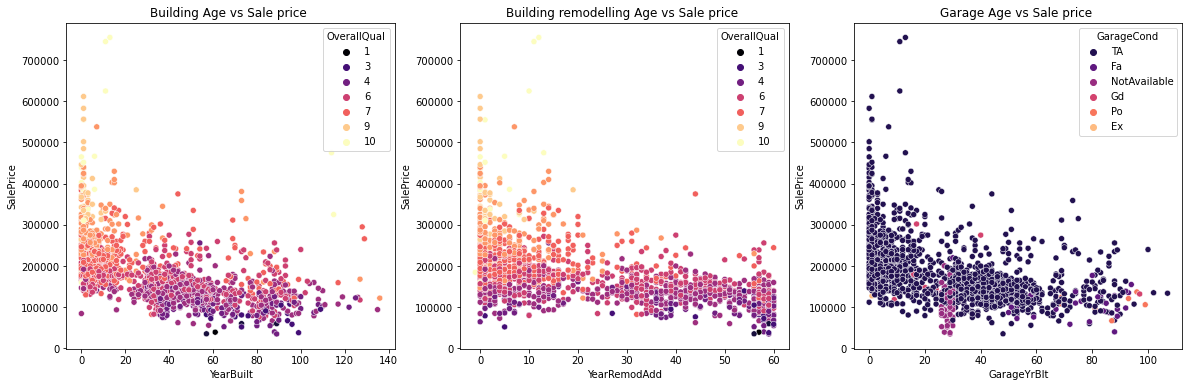

In [25]:
# Effect Of different Years features on the target (SalePrice)
i=1
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
sns.scatterplot(data['YearBuilt'],data['SalePrice'],hue=data['OverallQual'],palette='magma')
plt.title('Building Age vs Sale price ')

plt.subplot(1,3,2)
sns.scatterplot(data['YearRemodAdd'],data['SalePrice'],hue=data['OverallQual'],palette='magma')
plt.title('Building remodelling Age vs Sale price ')

plt.subplot(1,3,3)
sns.scatterplot(data['GarageYrBlt'],data['SalePrice'],hue=data.GarageCond,palette='magma')
plt.title('Garage Age vs Sale price ')

plt.show()

* The Plot shows data having less Years having High in price as:
    1. 'YearBuilt' Features showing  newly built houses  has high prices.as the building gets old the price gets decreased.And the hue represent the Quality of building.A good quality house with score near to 10 has high price segments.
    2. 'YearRemodAdd' Feature showing the same senario as the remodification age is inversly imapact on house prices.The Hue represnt the Quality of house after remodification , better the quality high the price of house.
    3. 'GarageYrblt' Feature shows it mostly not impact on the price if the garage is old  or new.The hue represent the quality of the house.mostly all the garage are average in quality a few were poor that makes very less price.

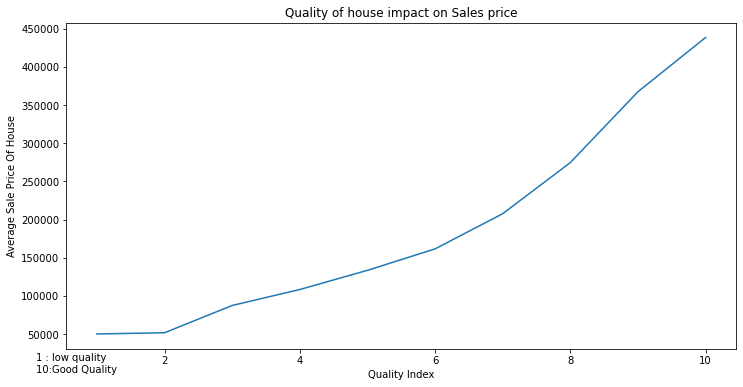

In [26]:
# Quality of House and Sales Price
overall_quality_house=data.groupby(data.OverallQual)['SalePrice'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=overall_quality_house.index,y=overall_quality_house.values)
plt.title('Quality of house impact on Sales price')
plt.xlabel("Quality Index")
plt.ylabel('Average Sale Price Of House')
plt.text(0.10,0.95,'1 : low quality\n10:Good Quality')
#text(0.85, 0.85,'Text Here', fontsize=9) #add text
plt.show()

* As Plot Indicates the price of house linearly increaseing as the quality of houses increases.

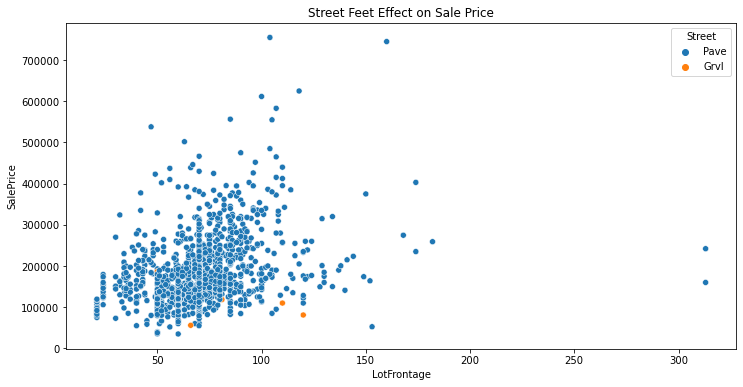

In [27]:
# Linear feet of  Street connected to property effect on property price.
plt.figure(figsize=(12,6))
sns.scatterplot(data.LotFrontage,data.SalePrice,hue=data.Street)
plt.title('Street Feet Effect on Sale Price')
plt.show()

* The street feet mostly do not affect the sale price of property.
* But the property having minimum feet of street has lowest price.
* Street feet mostly range in 50 to 100 , where sale price do not show any trend.
* Type of street also do not affect the property price.


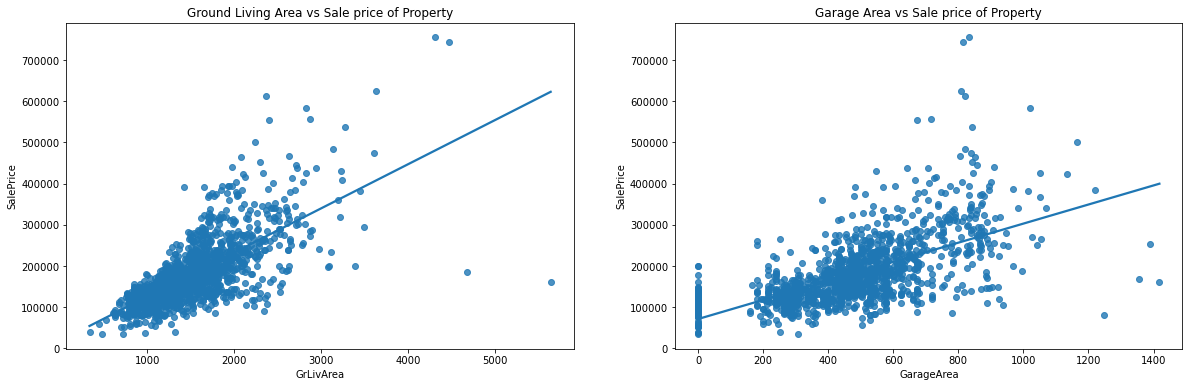

In [28]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.regplot(data.GrLivArea,data.SalePrice,ci=None)
plt.title('Ground Living Area vs Sale price of Property')

plt.subplot(1,2,2)
sns.regplot(data.GarageArea,data.SalePrice,ci=None)
plt.title('Garage Area vs Sale price of Property')
plt.show()

* Living Area shows a trend with the price .
* As Area increases the price of property increases.
* Also the variation in price range for different living room area increases with the area increases.
* The higher the living area there is range of prices for lower to higher limit.
* Same obseravtion with the garage area.
* Simply more the area more the price rule can be estimated here. 

In [29]:
data[num_col].head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,65.0,8450,7,5,5,5,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,5,2,548,0,61,0,0,0,0,0,2008,208500
1,80.0,9600,6,8,31,31,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,31,2,460,298,0,0,0,0,0,0,2007,181500
2,68.0,11250,7,5,7,6,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,7,2,608,0,42,0,0,0,0,0,2008,223500
3,60.0,9550,7,5,91,36,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,8,3,642,0,35,272,0,0,0,0,2006,140000
4,84.0,14260,8,5,8,8,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,8,3,836,192,84,0,0,0,0,0,2008,250000


#### Distribution Of Numeric Features

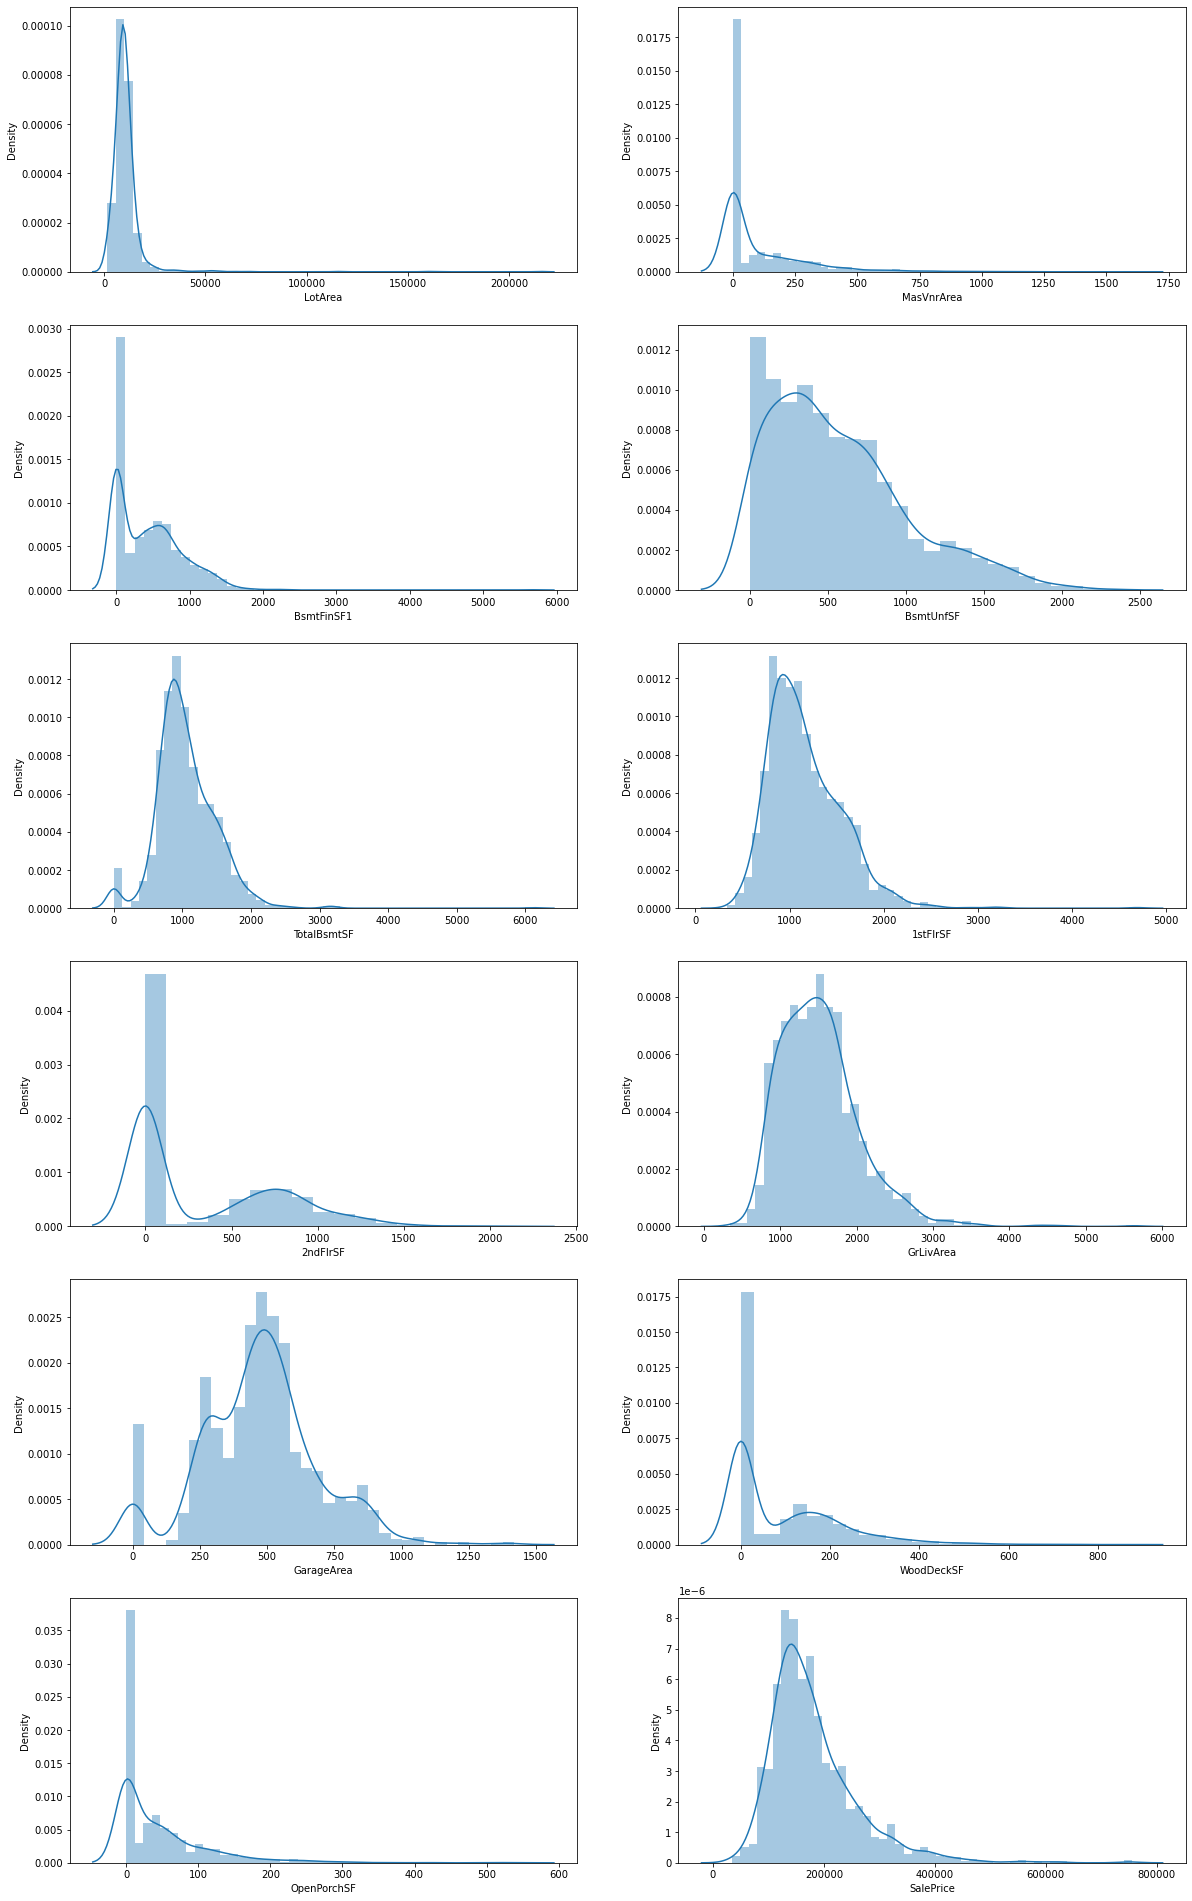

In [30]:
# Distribution of continues variable
temp3=pd.DataFrame(data[num_col].nunique(),columns=['values'])
continueos_features=temp3[temp3.values>150].index
rows=len(continueos_features)/2+1
colm=2
post=1
plt.figure(figsize=(20,40))
for col in continueos_features:
    plt.subplot(rows,colm,post)
    sns.distplot(data[col])
    
    post+=1


* All the numerical features are distributed normally but having a value 0 makes distribution uneven.
* Skewness in some features due to outliers are present.
* Outlier removal will help for distribution to be more normal.
* Transforming continues features into a log value will be usefull to make distribution Normal after Outliers treatment.

#### Analysis of Categorical Features on Target

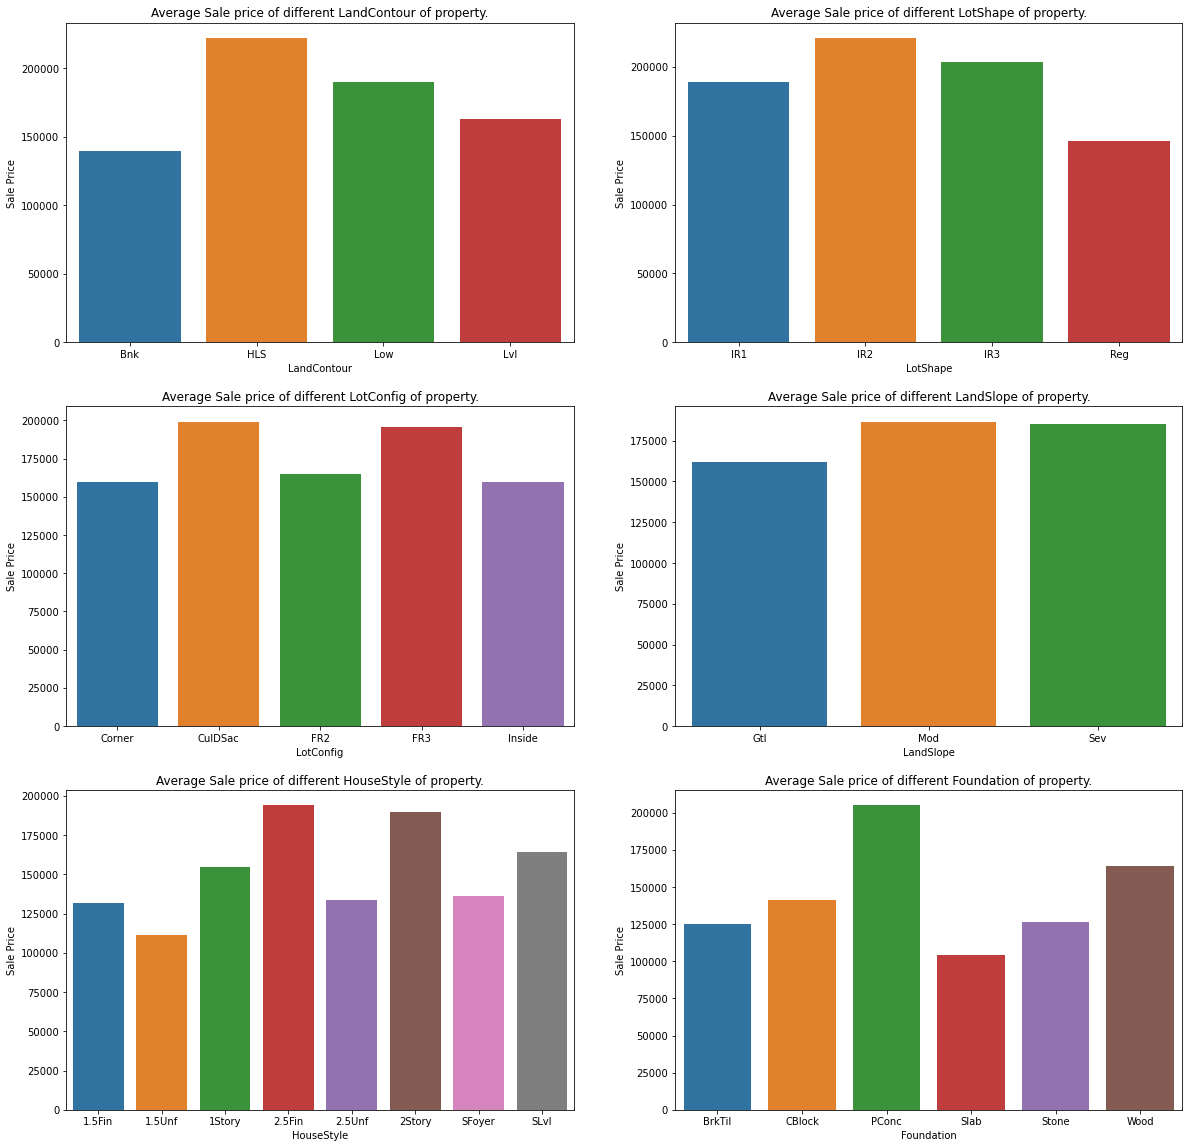

In [31]:
# Effect of different features on Sales Price of Property.
temp4=['LandContour','LotShape','LotConfig','LandSlope','HouseStyle','Foundation']
plt.figure(figsize=(20,20))
rows=3
colm=2
pos=1
for col in temp4:
    plt.subplot(rows,colm,pos)
    sns.barplot(data.groupby(col)['SalePrice'].mean().index,data.groupby(col)['SalePrice'].median().values)
    plt.title(f'Average Sale price of different {col} of property.')
    plt.ylabel('Sale Price')
    pos+=1

* In Land Contour The houses with location of hill side has higher prices than others. Highly banked location relatively low in price.
* General shape of property denoted by 'LotShape' does not seem to affect the price segment.
* For 'LotConfig' the configuration of property has not much effect on prices. 
* House Style creates much variation in the property price. Houses with two and half level finished are much expensive in prices. Next is a two-story house. One And half story unfinished has much less price in property.
*  For Foundations, Poured concrete foundation properties are in expensive category. Whereas the slab foundation are much cheaper.

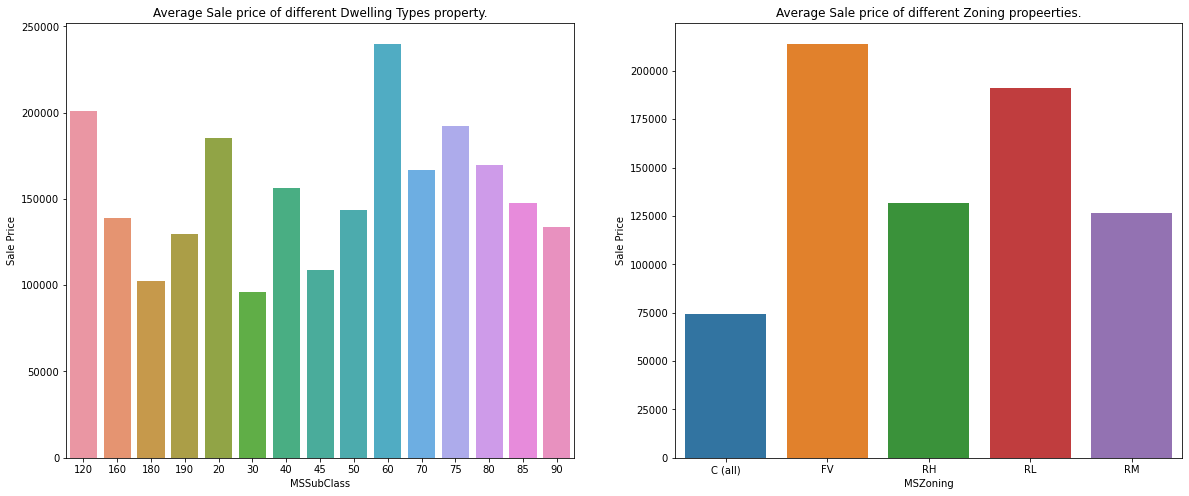

In [32]:
# Type Of dwelling in the sale and it's effect on Sale price of the property.
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.barplot(data.groupby('MSSubClass')['SalePrice'].mean().index,data.groupby('MSSubClass')['SalePrice'].mean().values)
plt.title('Average Sale price of different Dwelling Types property.')
plt.ylabel('Sale Price')

plt.subplot(1,2,2)
sns.barplot(data.groupby('MSZoning')['SalePrice'].mean().index,data.groupby('MSZoning')['SalePrice'].mean().values)
plt.title('Average Sale price of different Zoning propeerties.')
plt.ylabel('Sale Price')
plt.show()

* Dwelling type 60 has the highest Average property price indicating "2-STORY 1946 & NEWER" is more expensive in all.
* Following to 60, 120 has higher property prices showing '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'
* 30 - '1-STORY 1945 & OLDER' has lower prices in all. 
* FV -'Floating Village Residential' properties and RL-'Residential Low Density' are expensive properties. 

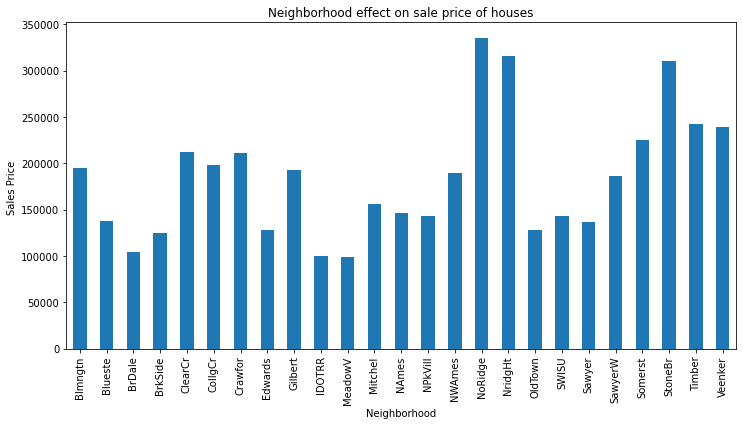

In [33]:
# neighbourhood effect on Property Price.
plt.figure(figsize=(12,6))
data.groupby(data.Neighborhood)['SalePrice'].mean().plot(kind='bar')
plt.title('Neighborhood effect on sale price of houses')
plt.ylabel('Sales Price ')
plt.show()

* 'NoRidge' , 'NridgHt' denoting as 'Northridge' and 'Northridge Heights' has the maximum price range in the neighborhood.
* 'Iowa DOT and Rail Road' as 'IDOTRR','Meadow Village' as 'MeadowV' and 'Briardale' as 'BrDale' are much cheaper property locations.


#### Outliers In Numeric Data


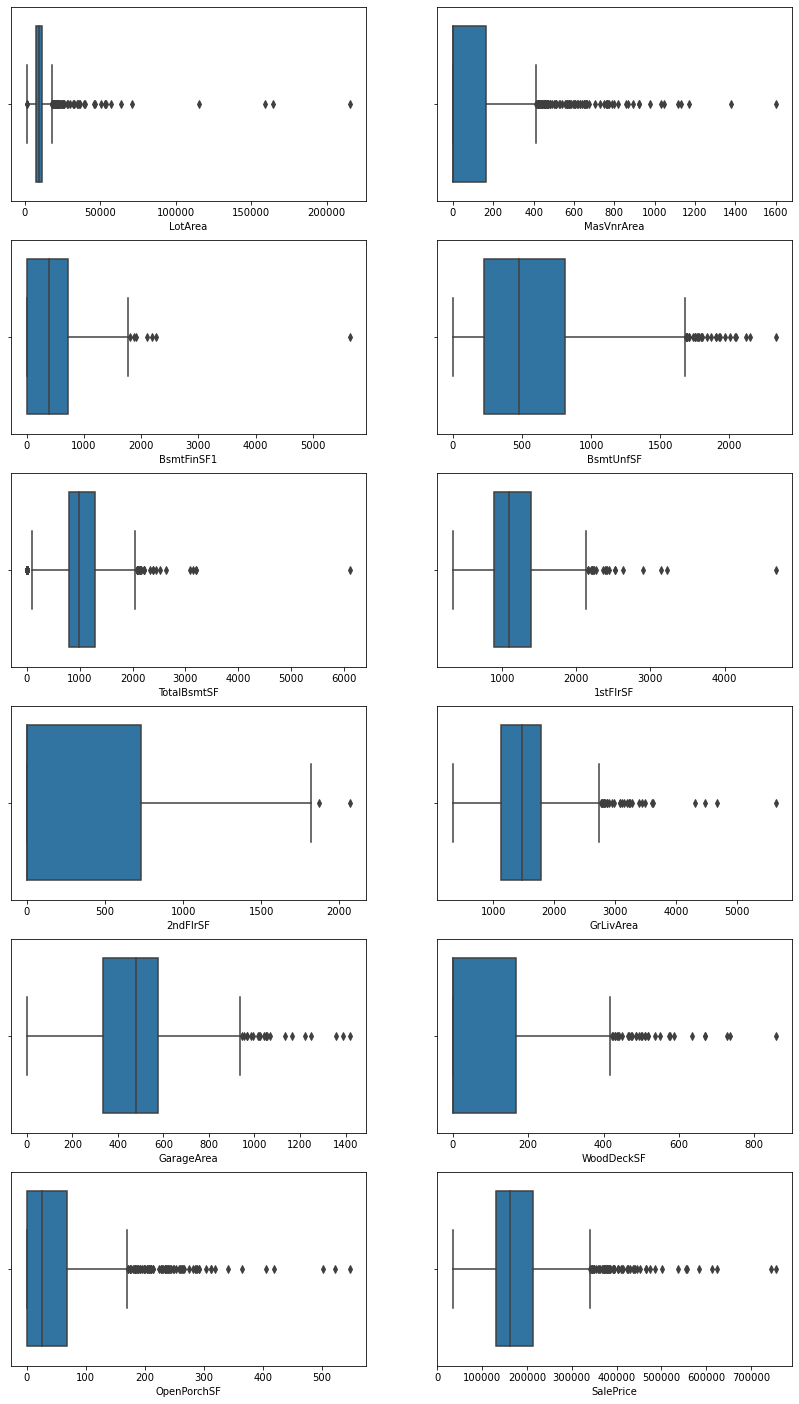

In [34]:
rows=6
cols=2
pos=1
plt.figure(figsize=(14,25))
for features in continueos_features:
    plt.subplot(rows,cols,pos)
    sns.boxplot(data[features])
    pos+=1


#### Relation of dependant and independant variable


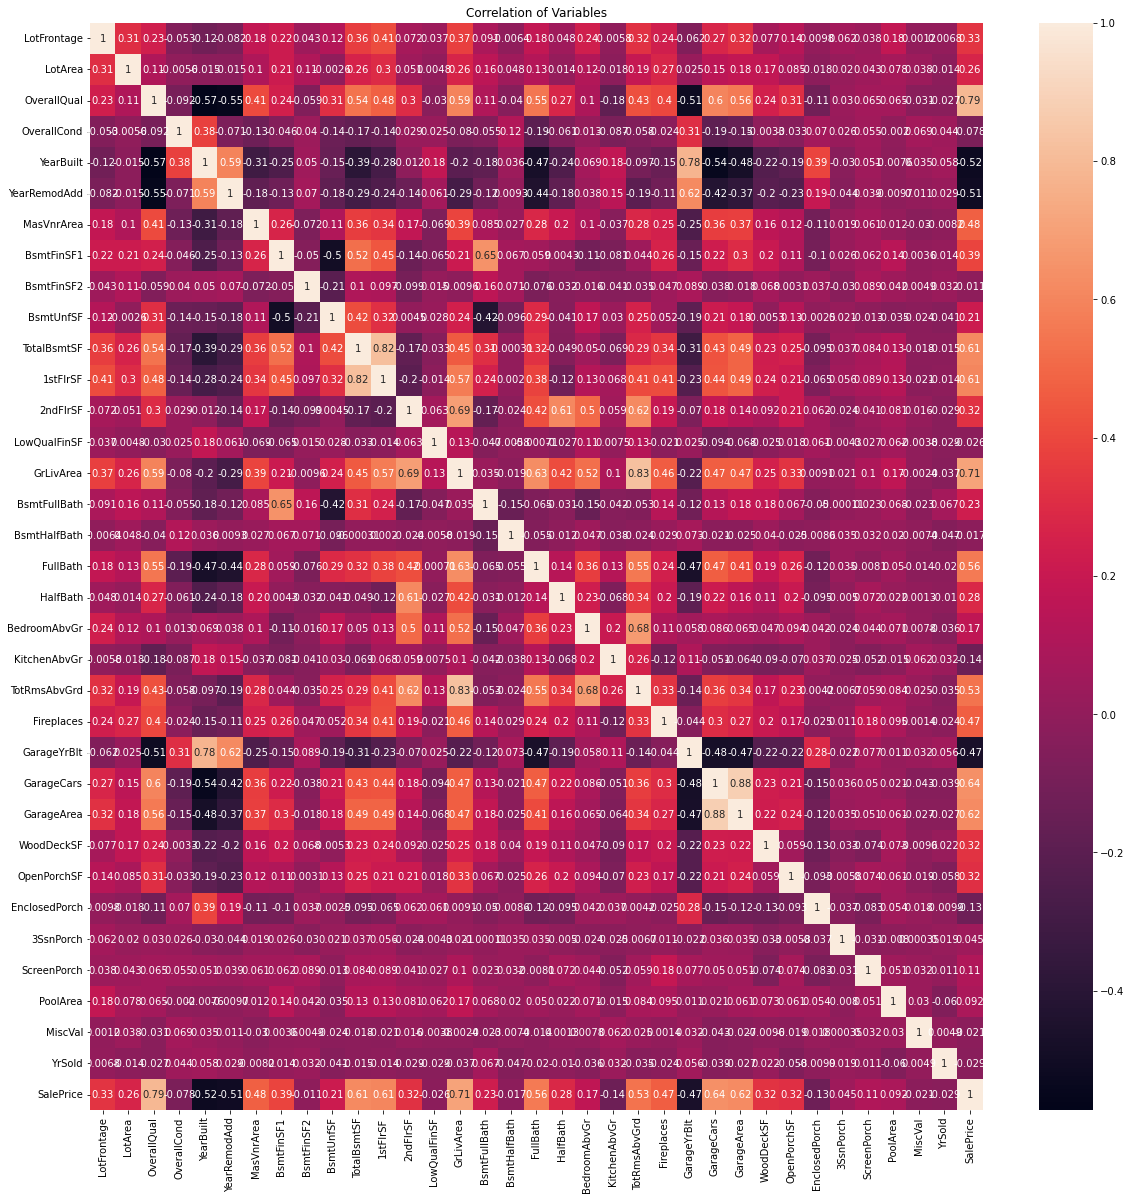

In [35]:
# A correlation matrix will show how the features are related to each others
corr_num=data[num_col].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_num,annot=True)
plt.title('Correlation of Variables')
plt.show()

* Only features 'GarageArea' and 'GarageCars' have correlation more than 0.80. Droping one out of those will be more benifical for model building.
* Correlated features can also be transformed by feature Engineering.


#### Target Variable Analysis

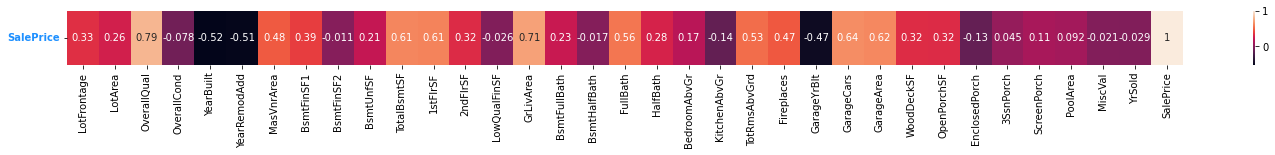

In [36]:
# Features Relation with the target
plt.figure(figsize=(25,1))
corr_num = data[num_col].corr()
sns.heatmap(corr_num.sort_values(by = ['SalePrice'], ascending = False).head(1),annot=True)
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

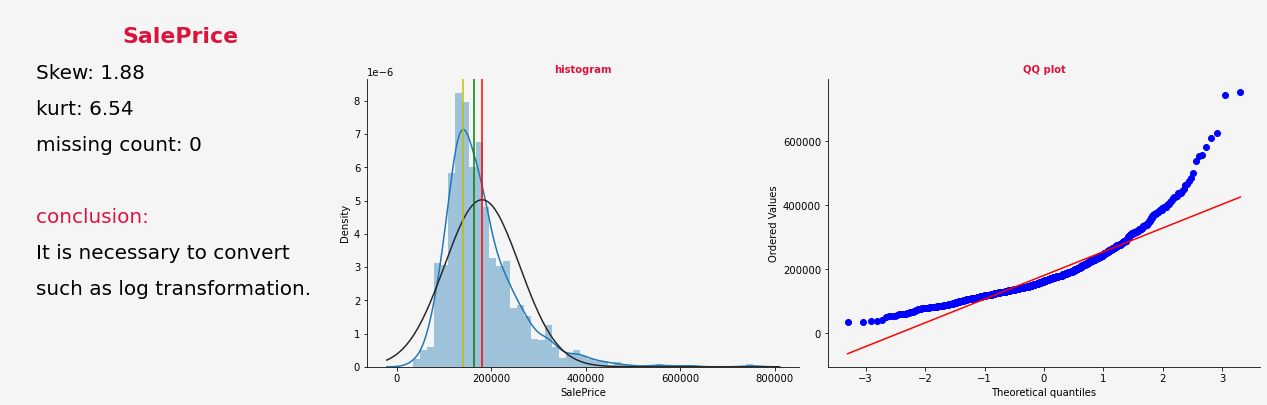

In [37]:
f = plt.figure(facecolor='whitesmoke', figsize=(20, 5))

ax_left = f.add_axes([0,0,.2,1], facecolor='whitesmoke')
ax_left.axis('off')
ax_left.text(.4, .9, 'SalePrice', color='crimson', size=22, weight='bold')
ax_left.text(.1, .8, f'Skew: {data.SalePrice.skew():.2f}', size=20)
ax_left.text(.1, .7, f'kurt: {data.SalePrice.kurt():.2f}', size=20)
ax_left.text(.1, .6, f'missing count: {data.SalePrice.isnull().sum()}', size=20)
ax_left.text(.1, .4, 'conclusion: ', color='crimson', size=20)
ax_left.text(.1, .3, 'It is necessary to convert', size=20)
ax_left.text(.1, .2, 'such as log transformation.', size=20)

ax_right1 = f.add_axes([0.25,0,.3,.8], facecolor='whitesmoke')
sns.distplot(data.SalePrice, fit=norm, ax=ax_right1)
plt.axvline(x=data['SalePrice'].mean(),color='r')
plt.axvline(x=data['SalePrice'].mode()[0],color='y')
plt.axvline(x=data['SalePrice'].median(),color='g')

#plt.text(data['SalePrice'].mean(),1,f'Mean',rotation=90,fontsize=9,weight='bold')
#plt.text(data['SalePrice'].median()-0.08,1,f'Median',rotation=90,fontsize=9,weight='bold')
#plt.text(data['SalePrice'].mode()[0],1,f'Mode',rotation=90,fontsize=9,weight='bold')
ax_right1.spines[['top', 'right']].set_visible(False)
ax_right1.set_title('histogram', color='crimson', weight='bold', size=10)

ax_right2 = f.add_axes([.57,0,.3,.8], facecolor='whitesmoke')
probplot(data.SalePrice, plot=ax_right2)
ax_right2.spines[['top', 'right']].set_visible(False)
ax_right2.set_title('QQ plot', color='crimson', weight='bold', size=10)

plt.show()

* Log transformation of of target variable :

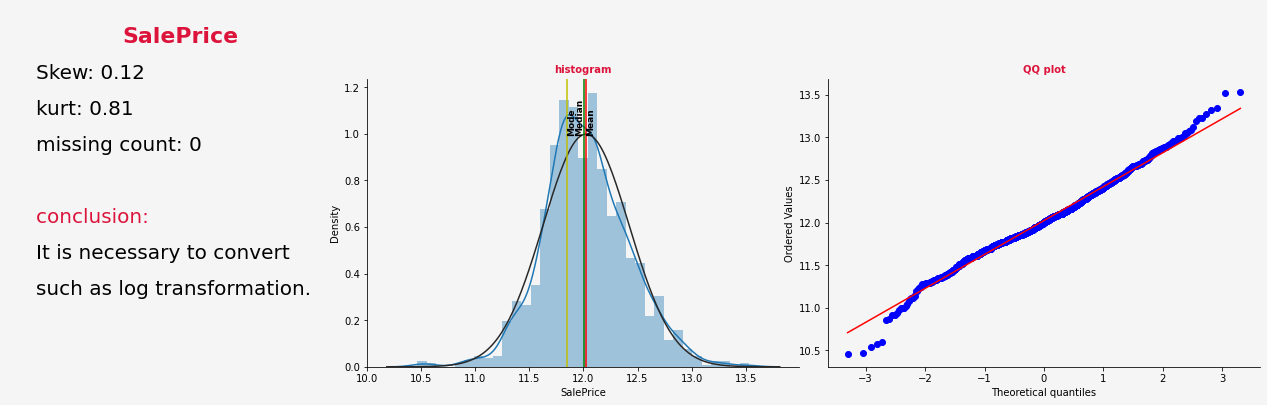

In [38]:
data["SalePrice"] = np.log1p(data["SalePrice"])

f = plt.figure(facecolor='whitesmoke', figsize=(20, 5))

ax_left = f.add_axes([0,0,.2,1], facecolor='whitesmoke')
ax_left.axis('off')
ax_left.text(.4, .9, 'SalePrice', color='crimson', size=22, weight='bold')
ax_left.text(.1, .8, f'Skew: {data.SalePrice.skew():.2f}', size=20)
ax_left.text(.1, .7, f'kurt: {data.SalePrice.kurt():.2f}', size=20)
ax_left.text(.1, .6, f'missing count: {data.SalePrice.isnull().sum()}', size=20)
ax_left.text(.1, .4, 'conclusion: ', color='crimson', size=20)
ax_left.text(.1, .3, 'It is necessary to convert', size=20)
ax_left.text(.1, .2, 'such as log transformation.', size=20)

ax_right1 = f.add_axes([0.25,0,.3,.8], facecolor='whitesmoke')
sns.distplot(data.SalePrice, fit=norm, ax=ax_right1)
plt.axvline(x=data['SalePrice'].mean(),color='r')
plt.axvline(x=data['SalePrice'].mode()[0],color='y')
plt.axvline(x=data['SalePrice'].median(),color='g')
angle=90
plt.text(data['SalePrice'].mean(),1,f'Mean',rotation=90,fontsize=9,weight='bold')
plt.text(data['SalePrice'].median()-0.08,1,f'Median',rotation=90,fontsize=9,weight='bold')
plt.text(data['SalePrice'].mode()[0],1,f'Mode',rotation=90,fontsize=9,weight='bold')
ax_right1.spines[['top', 'right']].set_visible(False)
ax_right1.set_title('histogram', color='crimson', weight='bold', size=10)

ax_right2 = f.add_axes([.57,0,.3,.8], facecolor='whitesmoke')
probplot(data.SalePrice, plot=ax_right2)
ax_right2.spines[['top', 'right']].set_visible(False)
ax_right2.set_title('QQ plot', color='crimson', weight='bold', size=10)

plt.show()

#### Feature engineering

In [39]:
# New feature to training data
data['pool']=data['PoolArea'].apply(lambda x: 1 if x>0 else 0)
data['garage']=data['GarageArea'].apply(lambda x: 1 if x>0 else 0)
data['Fireplaces']=data['Fireplaces'].apply(lambda x: 1 if x>0 else 0)
data['TwoFloors']=data['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)
data['basement']=data['TotalBsmtSF'].apply(lambda x: 1 if x>0 else 0)
data['TotalFloorArea']=(data['TotalBsmtSF']+data['1stFlrSF']+data['2ndFlrSF'])
data['TotalBathrooms']=data['BsmtFullBath']+data['FullBath']+(0.5*data['BsmtHalfBath'])+(0.5*data['HalfBath'])
data['Total_porch_sf'] = (data['OpenPorchSF'] + data['3SsnPorch'] +data['EnclosedPorch'] + data['ScreenPorch'])


#Same condition for testing
test['pool']=test['PoolArea'].apply(lambda x: 1 if x>0 else 0)
test['garage']=test['GarageArea'].apply(lambda x: 1 if x>0 else 0)
test['Fireplaces']=test['Fireplaces'].apply(lambda x: 1 if x>0 else 0)
test['TwoFloors']=test['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)
test['basement']=test['TotalBsmtSF'].apply(lambda x: 1 if x>0 else 0)
test['TotalFloorArea']=(test['TotalBsmtSF']+test['1stFlrSF']+test['2ndFlrSF'])
test['TotalBathrooms']=test['BsmtFullBath']+test['FullBath']+(0.5*test['BsmtHalfBath'])+(0.5*test['HalfBath'])
test['Total_porch_sf'] = (test['OpenPorchSF'] + test['3SsnPorch'] +test['EnclosedPorch'] + test['ScreenPorch'])


# Removing all engineered features that are not usefull now.
data.drop(['PoolArea','GarageArea','Fireplaces','2ndFlrSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','HalfBath','FullBath','BsmtHalfBath','BsmtFullBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','YearBuilt','GarageYrBlt'],axis=1,inplace=True)
test.drop(['PoolArea','GarageArea','Fireplaces','2ndFlrSF','TotalBsmtSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','HalfBath','FullBath','BsmtHalfBath','BsmtFullBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch','YearBuilt','GarageYrBlt'],axis=1,inplace=True)

In [40]:
print('Data Shape : ',data.shape)
print('Test Shape : ',test.shape)

Data Shape :  (1460, 67)
Test Shape :  (1355, 66)


#### Skewness In Numeric Data

In [41]:
# Data
x_num=data.select_dtypes(exclude='O').drop('SalePrice',1)
x_cat=data.select_dtypes(include='O')
y=data.SalePrice

# Test
x_num_test=test.select_dtypes(exclude='O')
x_cat_test=test.select_dtypes(include='O')

In [42]:
# data
skewed_feats =x_num.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness.Skew) > 0.5]
skewness

,Skew
MiscVal,24.451640
pool,14.337930
LotArea,12.195142
LowQualFinSF,9.002080
KitchenAbvGr,4.483784
BsmtFinSF2,4.250888
MasVnrArea,2.673661
LotFrontage,2.382499
Total_porch_sf,1.997973
TotalFloorArea,1.774874


In [43]:
skewness = skewness[abs(skewness) > 0.5]


skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    x_num[feat] = boxcox1p(x_num[feat],lam)

In [44]:
skewed_feats =x_num.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness.Skew) > 0.5]
skewness

,Skew
pool,14.337930
LowQualFinSF,7.593301
MiscVal,5.505530
KitchenAbvGr,3.995746
BsmtFinSF2,2.619350
LotArea,0.751948
MasVnrArea,0.583095
LotFrontage,-0.547185
BsmtUnfSF,-1.554895
garage,-3.883739


In [45]:
# test
skewed_feats_test =x_num_test.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness_test = pd.DataFrame({'Skew' :skewed_feats_test})
skewness_test = skewness_test[abs(skewness_test.Skew) > 0.5]

## Transformation :
skewed_features_test = skewness_test.index
lam = 0.15
for feat in skewed_features_test:
    x_num_test[feat] = boxcox1p(x_num_test[feat],lam)


### Data Preprocessing

In [46]:
lbl=LabelEncoder()
# data
lbl_x_cat=x_cat.copy()
for col in x_cat.columns:
    lbl_x_cat[col]=lbl.fit_transform(lbl_x_cat[col])


# test
lbl_x_cat_test=x_cat_test.copy()
for col in x_cat_test.columns:
    lbl_x_cat_test[col]=lbl.fit_transform(lbl_x_cat_test[col])

In [47]:
# data
df=data.copy()
df[x_num.columns]=x_num
df[lbl_x_cat.columns]=lbl_x_cat

# test
df_test=test.copy()
df_test[x_num_test.columns]=x_num_test
df_test[lbl_x_cat_test.columns]=lbl_x_cat_test

In [48]:
# For Training Data :

X=df.drop('SalePrice',1)

In [49]:
X.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition,pool,garage,TwoFloors,basement,TotalFloorArea,TotalBathrooms,Total_porch_sf
91,4,3,6.337529,19.235091,1,3,3,0,4,0,12,2,2,0,2,5,1.540963,5.172535,3,1,6,6,0,8.136454,3,4,1,4,4,3,5,10.740974,6,0.0,10.889404,1,4,1,5,0.0,12.729304,2,0.730463,3,2.259674,6,3,1,3,2,5,5,2,0.000000,0.000000,3,2006,8,0,0.0,0.730463,0,0.730463,14.853204,1.0,0.000000
730,0,3,4.926918,17.523956,1,0,3,0,4,0,22,2,2,4,2,8,2.055642,3.340760,1,1,5,5,2,0.000000,2,4,2,2,4,3,2,12.597323,6,0.0,9.806335,1,0,1,5,0.0,13.527003,2,0.730463,2,2.055642,6,5,1,2,2,5,5,2,8.482728,0.000000,5,2010,8,4,0.0,0.730463,0,0.730463,15.716683,3.0,7.511251
1295,4,3,5.968981,19.189158,1,3,3,0,4,0,12,1,2,0,2,5,2.055642,4.882973,3,1,6,6,1,7.724359,3,4,1,4,4,0,1,12.170123,6,0.0,4.792130,1,2,1,5,0.0,12.268668,3,0.730463,3,2.055642,6,3,1,2,1,5,5,2,9.432707,0.000000,2,2006,8,4,0.0,0.730463,0,0.730463,14.341906,2.5,0.000000
611,12,3,5.970314,20.028872,1,0,3,0,2,0,14,2,2,0,7,6,2.259674,4.437269,1,1,6,6,1,8.444261,3,4,1,2,4,0,0,10.762621,6,0.0,9.876754,1,4,1,5,0.0,12.214281,3,0.730463,3,2.259674,6,5,1,3,2,5,5,2,0.000000,10.272202,9,2007,8,4,0.0,0.730463,0,0.730463,14.281535,2.5,0.000000
1278,9,3,6.098626,19.659568,1,3,3,0,4,0,5,2,2,0,5,8,2.055642,2.259674,1,1,12,13,3,6.726756,2,4,2,2,4,3,2,11.521048,6,0.0,9.207511,1,0,1,5,0.0,14.230976,3,0.730463,2,2.440268,6,2,1,2,2,5,5,2,0.000000,0.000000,5,2008,8,4,0.0,0.730463,1,0.730463,15.661949,3.5,8.222114


In [50]:
df_test.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition,pool,garage,TwoFloors,basement,TotalFloorArea,TotalBathrooms,Total_porch_sf
1253,1,1,4.137711,14.948665,1,3,3,0,4,0,21,2,2,3,4,7,2.055642,1,1,0,6,8,2,0.000000,2,4,2,2,4,3,6,0.000000,6,0.0,10.740974,0,0,1,3,6.221214,12.700940,1.194318,0.730463,2,1.820334,6,3,5,2,2.0,4,5,2,0.000000,0.0,9,2006,8,4,0.0,0.730463,1,0.730463,13.757329,1.378202,7.698683
686,3,3,5.930757,20.081348,1,3,3,0,0,0,4,2,2,0,2,5,1.540963,48,0,1,7,9,4,8.823108,3,4,1,4,4,2,5,12.091405,6,0.0,0.000000,0,2,1,3,0.000000,13.718474,1.540963,0.730463,3,2.440268,4,5,2,3,2.0,4,5,2,5.357203,0.0,3,2008,8,0,0.0,0.730463,0,0.730463,15.153303,1.540963,6.314735
382,4,3,6.098626,20.480424,1,3,3,0,4,0,19,2,2,0,2,5,2.259674,42,3,0,5,6,1,7.774945,3,4,1,4,4,3,1,10.406097,6,0.0,10.396381,0,4,1,3,0.000000,12.268668,1.540963,0.730463,3,2.259674,6,4,1,0,1.0,4,5,2,0.000000,0.0,6,2009,8,0,0.0,0.730463,0,0.730463,14.341906,0.982247,8.263918
794,9,3,5.930757,19.297281,1,0,3,0,4,0,8,2,2,0,4,6,2.055642,7,1,0,9,12,2,0.000000,3,4,2,2,4,3,0,11.740469,6,0.0,5.426781,0,2,1,3,0.000000,13.706023,1.540963,0.730463,3,2.440268,6,5,1,0,2.0,4,5,2,8.658271,0.0,6,2007,8,0,0.0,0.730463,1,0.730463,15.065347,1.687259,5.285266
1374,4,3,6.172972,19.593662,1,3,3,0,4,0,5,2,2,0,2,7,2.055642,1,1,0,9,12,1,7.338607,2,4,2,2,4,1,2,5.559490,6,0.0,13.416660,0,0,1,3,0.000000,13.523254,1.540963,0.730463,2,2.440268,6,2,1,0,2.0,4,5,2,6.654950,0.0,5,2006,8,4,0.0,0.730463,0,0.730463,15.734413,1.194318,5.172535


In [51]:
y.sample(5)

434     11.302217
1221    11.805603
1032    12.644331
449     11.695255
1037    12.567241
Name: SalePrice, dtype: float64

In [52]:
# Splitting Data For Model Building.
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [53]:
# Data Scaling Using MinMax Transformation.
scaler=MinMaxScaler()
x_train_scale=scaler.fit_transform(x_train)
x_test_scale=scaler.transform(x_test)

In [54]:
# Testing data
test_mm=scaler.transform(df_test)

In [55]:
# Data Scaling Using StanderdScaler Transformation.
scaler2=StandardScaler()
x_train_scale2=scaler2.fit_transform(x_train)
x_test_scale2=scaler2.transform(x_test)

In [56]:
# Testing data
test_ss=scaler2.transform(df_test)

### Model Building

In [57]:
# Base Linear Regression Model :

def linear_model(xtrain,xtest,ytrain,ytest):
    model=LinearRegression()
    model.fit(xtrain,ytrain)

    y_train_pred=model.predict(xtrain)
    y_test_pred=model.predict(xtest)
    r2_train=metrics.r2_score(ytrain,y_train_pred)
    r2_test=metrics.r2_score(ytest,y_test_pred)

    print('R2 train:{:.3f}  R2 test:{:.3f}'.format(r2_train,r2_test))

    print("RMSE of Linear Regression (train data) : %.3f"%np.sqrt(mean_squared_error(y_train, y_train_pred)))

    print("RMSE of Linear Regression (test data) : %.3f"%np.sqrt(mean_squared_error(y_test, y_test_pred)))
    
    return(model,y_train_pred,y_test_pred)

In [58]:
# Creating Base Model :
model,train_pred,test_pred=linear_model(x_train,x_test,y_train,y_test)

R2 train:0.898  R2 test:0.883
RMSE of Linear Regression (train data) : 0.126
RMSE of Linear Regression (test data) : 0.141


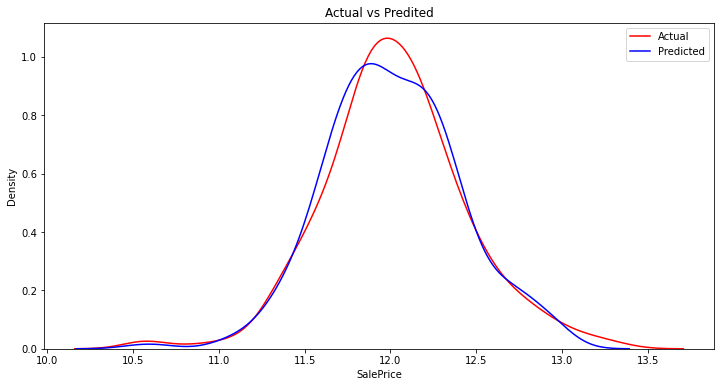

In [59]:
# chart showing actual and predicted values - dist plot(test data)
plt.figure(figsize=(12,6))
ax1 = sns.distplot(y_test,hist=False,color='red',label='Actual')
sns.distplot(test_pred,hist=False,color='blue',label='Predicted',ax=ax1)
plt.title('Actual vs Predited')
plt.legend()
plt.show()

#### Assumption Validation 

In [60]:
def residuals_calculaton(model,independant_variables,dependant_variable):
    predictions = model.predict(independant_variables)
    results = pd.DataFrame({'Actual': dependant_variable, 'Predicted': predictions})
    results['Residuals'] = abs(results['Actual']) - abs(results['Predicted'])
    return results

In [61]:
class assumptions:
        
    #--------------------------------------------------------------------------------------------------#

    # assumption 1 : The independant and dependant variable create linear relationship
    def linear_assumption1(self,model,x_data,y_data):
   
        print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
        print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
        resid=residuals_calculaton(model,x_data,y_data)
        # Plotting the actual vs predicted values
        plt.figure(figsize=(8,8))
        sns.regplot(np.expm1(resid.Actual),np.expm1(resid.Predicted), scatter_kws=dict(color="blue"), line_kws=dict(color="red", linewidth=3))
        plt.title("Linear Regression Actual vs Predict Train Data")
        plt.xlabel("Actual Value")
        plt.ylabel("Predicit Value")
        plt.grid()
        plt.show()
        print('\n\tAssumption Verified')
    #------------------------------------------------------------------------------------------------------#

    # Assumption 2: Normality: Assumes that the error terms are normally distributed. If they are not, nonlinear transformations of variables may solve this.
    def Normality_assumption2(self,model,x_data,y_data):
        resid=residuals_calculaton(model,x_data,y_data)
        print('Assumption 2 : Distribution of residuals is normal')
        print('\nFor Normal Distribution the Dsitribution plot below shows data concentrated around 0')
        print('\nThe Probablity plot shows how normally error is distributed by showing most of the points around line')

        f = plt.figure(facecolor='whitesmoke', figsize=(15, 5))

        ax_left1 = f.add_axes([0,0,0.5,1], facecolor='whitesmoke')
        sns.distplot(resid.Residuals,kde=True,ax=ax_left1)
        plt.title('Distribution of Residuals')
        ax_right1 = f.add_axes([0.50,0,0.5,1], facecolor='whitesmoke')
        probplot(resid.Residuals,fit=True,plot=ax_right1)
        plt.show()
        print('\n\tAssumption Verified')

    #------------------------------------------------------------------------------------------------------------#

    # Assumption 3 :mean of residuals is equal to  0
    def Residualmean_assumption3(self,model,x_data,y_data):
        resid=residuals_calculaton(model,x_data,y_data)
        print('Assumption 3 : Mean of residuals is 0')
        print('\nResidual mean for training data :',np.mean(resid.Residuals))
        # Plotting Residuals.
        plt.figure(figsize=(12,6))
        sns.residplot(resid.Actual,resid.Predicted)
        plt.title('Residual plot for Training data')
        plt.show()
        print('\n\tAssumption Verified')

    #-------------------------------------------------------------------------------------------------------------#

    # Assumption 4 :Homoscedasticity: Assumes that the errors exhibit constant variance
    def homoscedasticity_assumption4(self,model,x_data,y_data):
        resid=residuals_calculaton(model,x_data,y_data)
        print('Assumption 4: Homoscedasticity of Error Terms', '\n')
        print('Residuals should have relative constant variance')
        # Plotting the residuals
        plt.subplots(figsize=(12, 6))
        ax = plt.subplot(111)  # To remove spines
        plt.scatter(x=resid.index, y=resid.Residuals, alpha=0.5)
        plt.plot(np.repeat(0, resid.index.max()), color='darkorange', linestyle='--')
        ax.spines['right'].set_visible(False)  # Removing the right spine
        ax.spines['top'].set_visible(False)  # Removing the top spine
        plt.title('Residuals Variance')
        plt.show()
        print('\n\tAssumption Verified')
    
    #--------------------------------------------------------------------------------------------------#

    # Assumption 5 : No autocorrelation occurs between residual errors
    def autocorrelation_assumption5(self,model,x_data,y_data):
        resid=residuals_calculaton(model,x_data,y_data)
        print('Assumption 5: Auto-Corelation in residuals', '\n')
        print('Residuals should not show autocorelation')
        print('The below Correlogram shows the Correlation coefficient on the Y-Axis and the time lag of that correlation, on the X-Axis.\nif correlation value is high the instances will cross significance boundry and if there is no upward or downward pattern while traversing through the X-Axis,\nthe possibilities of serial correlation can be demolished.')
        acf=smt.graphics.plot_acf(resid.Residuals)
        acf.show()
        
        print('\n\tAssumption Verified')

    #-----------------------------------------------------------------------------------------------------#


    

In [62]:
# Instance of class
asm=assumptions()

##### Asssumption 1

Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


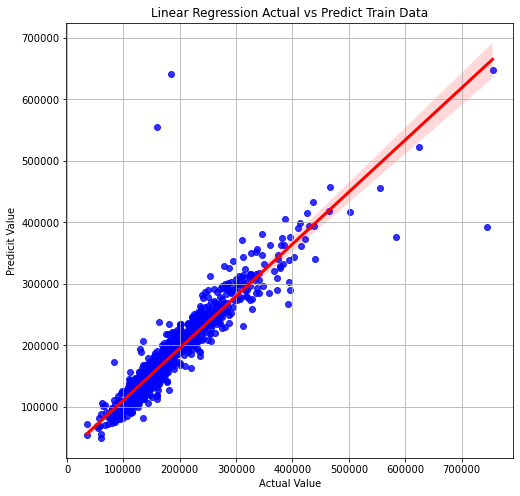


	Assumption Verified


In [63]:
asm.linear_assumption1(model,x_train,y_train)

##### Assumption 2

Assumption 2 : Distribution of residuals is normal

For Normal Distribution the Dsitribution plot below shows data concentrated around 0

The Probablity plot shows how normally error is distributed by showing most of the points around line


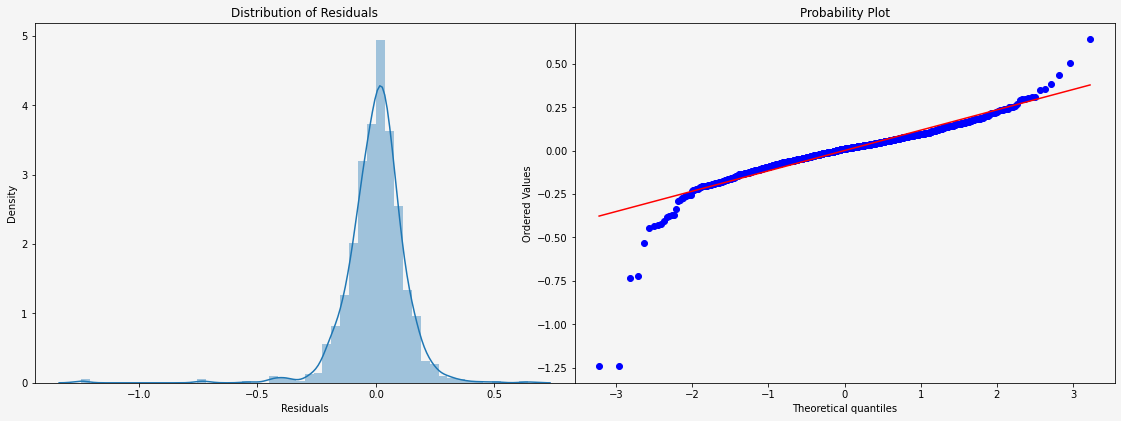


	Assumption Verified


In [64]:
asm.Normality_assumption2(model,x_train,y_train)

##### Assumption 3

Assumption 3 : Mean of residuals is 0

Residual mean for training data : -2.4187653402244508e-15


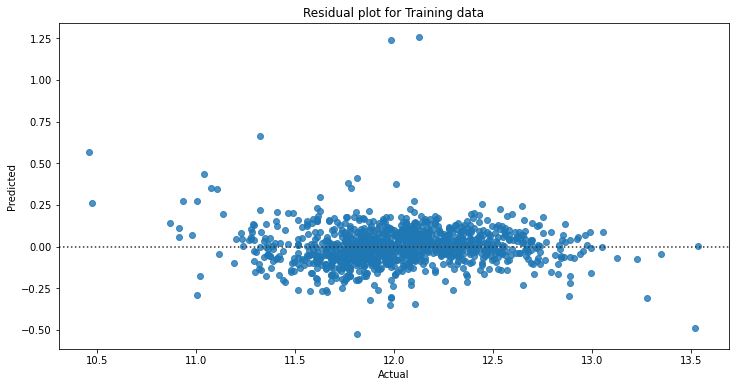


	Assumption Verified


In [65]:
asm.Residualmean_assumption3(model,x_train,y_train)

##### Asumption 4

Assumption 4: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


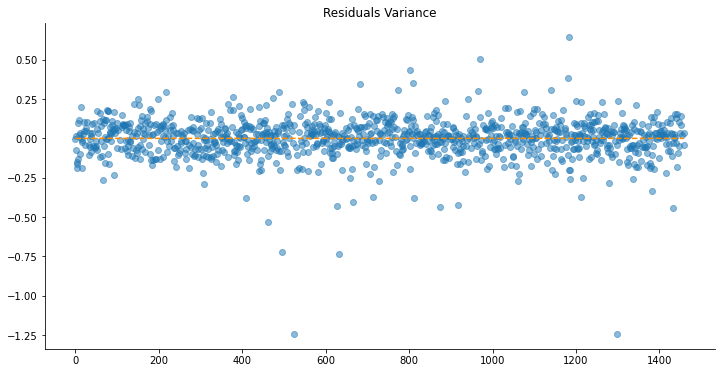


	Assumption Verified


In [66]:
asm.homoscedasticity_assumption4(model,x_train,y_train)

##### Assumption 5

Assumption 5: Auto-Corelation in residuals 

Residuals should not show autocorelation
The below Correlogram shows the Correlation coefficient on the Y-Axis and the time lag of that correlation, on the X-Axis.
if correlation value is high the instances will cross significance boundry and if there is no upward or downward pattern while traversing through the X-Axis,
the possibilities of serial correlation can be demolished.

	Assumption Verified


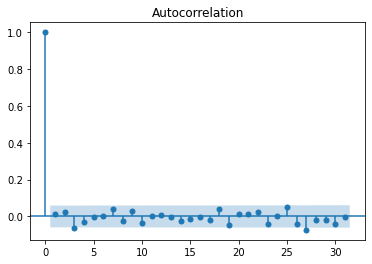

In [67]:
asm.autocorrelation_assumption5(model,x_train,y_train)

### Cross validation


#### Cross Validation

In [68]:
folds=KFold(n_splits=9,shuffle=True,random_state=100)
scores = cross_val_score(model,x_train,y_train,cv=folds)
print("Mean cross-validation score: %.2f" % np.mean(scores))

Mean cross-validation score: 0.85


#### Effect of Data Scaling

In [69]:
# Using MinmaxScaler
model_mm=linear_model(x_train_scale,x_test_scale,y_train,y_test)

R2 train:0.898  R2 test:0.883
RMSE of Linear Regression (train data) : 0.126
RMSE of Linear Regression (test data) : 0.141


In [70]:
# Using StanderdScaler
model_ss=linear_model(x_train_scale2,x_test_scale2,y_train,y_test)

R2 train:0.898  R2 test:0.883
RMSE of Linear Regression (train data) : 0.126
RMSE of Linear Regression (test data) : 0.141


* All the data transformation showing same result on base model

### Regulization


#### Ridge Regression

In [71]:
# Finding best alpha for ridge
folds=KFold(n_splits=9,shuffle=True,random_state=100)
params={'alpha':[0.0001,0.001,0.01,0.1,0.2,0.5,0.9,1.0,5.0,10.0,20.0]}
model_r=Ridge()
# Gridsearch
model_cv=GridSearchCV(estimator=model_r,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(x_train,y_train)

Fitting 9 folds for each of 11 candidates, totalling 99 fits


GridSearchCV(cv=KFold(n_splits=9, random_state=100, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0,
                                   5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [72]:
model_cv.best_params_

{'alpha': 10.0}

In [73]:
# Ridge Regression with best parameters
model_r=Ridge(alpha=10)
model_r.fit(x_train,y_train)
y_train_pred_r=model_r.predict(x_train)
y_test_pred_r=model_r.predict(x_test)
r2_train_r=metrics.r2_score(y_train,y_train_pred_r)
r2_test_r=metrics.r2_score(y_test,y_test_pred_r)

print('R2 train:{:.3f}  R2 test:{:.3f}'.format(r2_train_r,r2_test_r))

print("RMSE of Linear Regression (Train Data): %.3f"%np.sqrt(mean_squared_error(y_train, y_train_pred_r)))
print("RMSE of Linear Regression (Test Data): %.3f"%np.sqrt(mean_squared_error(y_test, y_test_pred_r)))

R2 train:0.894  R2 test:0.893
RMSE of Linear Regression (Train Data): 0.129
RMSE of Linear Regression (Test Data): 0.135


In [74]:
# Finding best alpha for Lasso
folds=KFold(n_splits=9,shuffle=True,random_state=100)
params={'alpha':[0.0001,0.001,0.01,0.1,0.2,0.5,0.9,1.0,5.0,10.0,20.0]}
model_l=Lasso()
# Gridsearch
model_cv=GridSearchCV(estimator=model_l,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=1)
model_cv.fit(x_train,y_train)

Fitting 9 folds for each of 11 candidates, totalling 99 fits


GridSearchCV(cv=KFold(n_splits=9, random_state=100, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0,
                                   5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [75]:
model_cv.best_params_

{'alpha': 0.001}

In [76]:
# lasso Regression
model_l=Lasso(alpha=0.001)
model_l.fit(x_train,y_train)
y_train_pred_l=model_l.predict(x_train)
y_test_pred_l=model_l.predict(x_test)
r2_train_l=metrics.r2_score(y_train,y_train_pred_l)
r2_test_l=metrics.r2_score(y_test,y_test_pred_l)

print('R2 train:{:.3f}  R2 test:{:.3f}'.format(r2_train_l,r2_test_l))

print("RMSE of Linear Regression (Train Data): %.3f"%np.sqrt(mean_squared_error(y_train, y_train_pred_l)))
print("RMSE of Linear Regression (Test data): %.3f"%np.sqrt(mean_squared_error(y_test, y_test_pred_l)))

R2 train:0.892  R2 test:0.894
RMSE of Linear Regression (Train Data): 0.130
RMSE of Linear Regression (Test data): 0.134


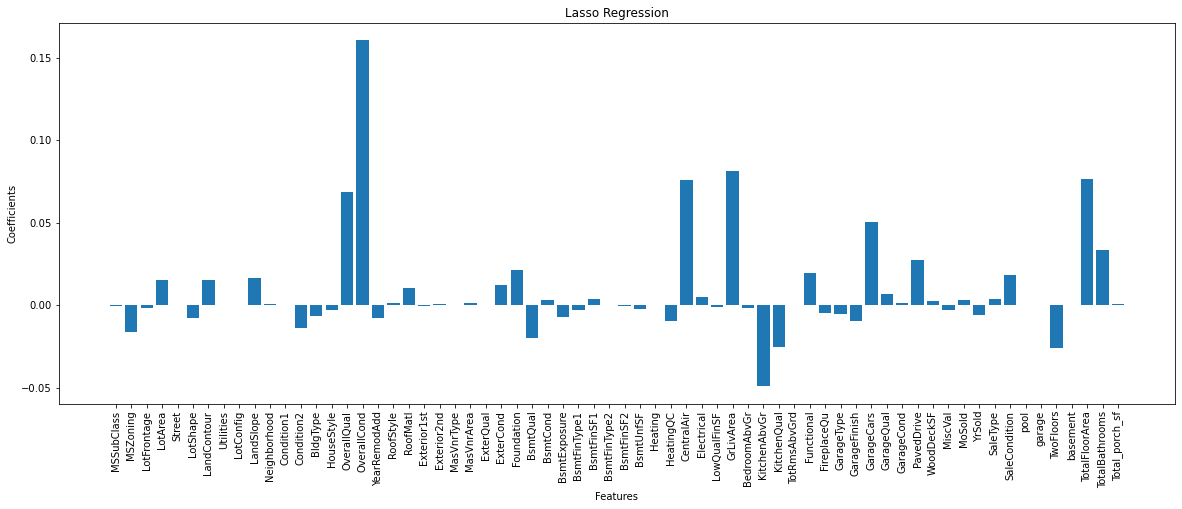

In [77]:
plt.figure(figsize =(20,7))
plt.bar(x_train.columns,model_l.coef_)
plt.xticks(rotation=90)
plt.title('Lasso Regression')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

### Test Data Prediction :
* using Ridge regression for predicting price of houses.

In [78]:
test_prediction=np.expm1(model_l.predict(df_test))

In [79]:
results=pd.DataFrame({'predictions':np.round(test_prediction,2)})

In [80]:
results

,predictions
0,80124.49
1,103692.21
2,154537.75
3,171404.06
4,146020.16
...,...
1350,67249.58
1351,62844.63
1352,144170.00
1353,103810.33


In [81]:
# Combining results with test data
test['Predictions-SalePrice']=np.round(test_prediction,2)

In [82]:
test.sample(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,WoodDeckSF,MiscVal,MoSold,YrSold,SaleType,SaleCondition,pool,garage,TwoFloors,basement,TotalFloorArea,TotalBathrooms,Total_porch_sf,Predictions-SalePrice
175,20,RL,58.000000,7250,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,5,16,Gable,CompShg,HdBoard,HdBoard,BrkFace,45.000000,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1181.0,GasA,Ex,Y,SBrkr,0,1190,3,1,Gd,6,Typ,TA,Attchd,Unf,2.0,TA,TA,Y,0,0,11,2009,WD,Normal,0,1,0,1,2371.0,2.0,21,131420.85
241,20,RL,86.000000,11194,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,PosN,Norm,1Fam,1Story,8,5,1,Gable,CompShg,VinylSd,VinylSd,Stone,240.000000,Gd,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,1696.0,GasA,Ex,Y,SBrkr,0,1696,3,1,Gd,7,Typ,NotAvailable,Attchd,RFn,3.0,TA,TA,Y,120,0,9,2009,WD,Normal,0,1,0,1,3392.0,2.0,56,241949.12
544,20,RL,87.000000,10037,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,1,Hip,CompShg,VinylSd,VinylSd,NotAvailable,100.709141,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,GasA,Ex,Y,SBrkr,0,1460,3,1,Gd,6,Typ,Gd,Attchd,Fin,2.0,TA,TA,Y,0,0,8,2008,WD,Normal,0,1,0,1,2920.0,2.0,20,229481.16
424,20,RL,90.000000,15750,Pave,Reg,Lvl,AllPub,FR3,Gtl,CollgCr,Feedr,Norm,1Fam,1Story,8,5,9,Gable,CompShg,VinylSd,VinylSd,BrkFace,260.000000,Gd,TA,PConc,Gd,TA,Gd,GLQ,1246.0,Unf,0.0,216.0,GasA,Ex,Y,SBrkr,0,1513,2,1,Gd,5,Typ,TA,Attchd,Fin,2.0,TA,TA,Y,135,0,6,2009,WD,Normal,0,1,0,1,2975.0,3.0,34,220905.01
763,60,RL,68.580357,11050,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,2Story,7,5,11,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,Mn,Unf,0.0,Unf,0.0,910.0,GasA,Ex,Y,SBrkr,0,1820,3,1,Gd,8,Typ,TA,Attchd,Unf,3.0,TA,TA,Y,318,0,9,2008,WD,Normal,0,1,1,1,2730.0,2.5,32,187244.47
408,20,RL,64.000000,6762,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2,Gable,CompShg,VinylSd,VinylSd,None,0.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,902.0,Unf,0.0,380.0,GasA,Ex,Y,SBrkr,0,1290,2,1,Gd,6,Typ,Gd,Attchd,RFn,2.0,TA,TA,Y,168,0,5,2009,WD,Normal,0,1,0,1,2572.0,3.0,0,188237.53
1223,60,RL,68.580357,10236,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,11,Gable,CompShg,VinylSd,VinylSd,BrkFace,501.000000,Gd,TA,PConc,Gd,TA,Gd,GLQ,380.0,BLQ,168.0,742.0,GasA,Ex,Y,SBrkr,0,2494,4,1,Gd,9,Typ,TA,Attchd,Fin,3.0,TA,TA,Y,200,0,6,2006,WD,Normal,0,1,1,1,3784.0,3.5,95,268881.89
116,20,RL,64.000000,7360,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,0,Gable,CompShg,VinylSd,VinylSd,Stone,80.000000,Gd,TA,PConc,Gd,TA,No,GLQ,24.0,Unf,0.0,1198.0,GasA,Ex,Y,SBrkr,0,1222,2,1,Gd,6,Typ,NotAvailable,Attchd,RFn,2.0,TA,TA,Y,0,0,3,2010,WD,Normal,0,1,0,1,2444.0,2.0,54,171026.93
79,190,RM,100.000000,9045,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,5,3,60,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,Fa,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,840.0,Grav,Fa,N,FuseF,0,2256,4,2,Fa,12,Typ,NotAvailable,NotAvailable,NotAvailable,0.0,NotAvailable,NotAvailable,N,0,0,6,2010,WD,Abnorml,0,0,1,1,3096.0,2.0,36,62026.08
1302,20,RL,80.000000,10800,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,14,Gable,CompShg,HdBoard,HdBoard,BrkFace,104.000000,TA,TA,CBlock,TA,TA,No,Rec,913.0,Unf,0.0,400.0,GasA,TA,Y,SBrkr,0,1773,3,1,TA,6,Min2,TA,Attchd,RFn,2.0,TA,TA,Y,355,0,8,2006,WD,Normal,0,1,0,1,3086.0,3.0,242,160306.27


In [83]:
np.expm1(data.SalePrice).describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [85]:
test['Predictions-SalePrice'].describe()

count      1355.000000
mean     146018.301779
std       73889.630323
min       29412.740000
25%       90268.685000
50%      126800.290000
75%      185100.705000
max      631212.100000
Name: Predictions-SalePrice, dtype: float64

In [86]:
#sub = pd.DataFrame()
#sub['Id'] = test.index
#sub['SalePrice'] =np.round(test_prediction,2)
#sub.to_csv('submission.csv',index=False)
#test.to_csv('test_prediction.csv',index=False)